In [1]:
from tools import data_preparation as dp
from tools import connections
import requests

import pandas as pd
import numpy as np
import requests
import datetime
import os
import sys

In [2]:
import os
print(os.getcwd())

C:\Users\kocin\Desktop\crypto\supplier\notebooks


In [3]:
con = connections.connect_postgres()

In [12]:
q = "SELECT * FROM cg_slugs where blacklisted is false and checked is false and coin ~* '^[C]' order by coin"

In [13]:
df = pd.read_sql_query(q, con).reset_index(drop=True)

In [14]:
df.head()

,coin,name,slug,blacklisted,gem,checked,description,date
0,CLH,ClearDAO,cleardao,False,False,False,ethereum-defi-derivatives,2022-04-11 19:34:29
1,CLOAK,Cloakcoin,cloakcoin,False,False,False,default,2022-04-11 19:34:29
2,CLUNA,Prism cLUNA,prism-cluna,False,False,False,default,2022-04-11 19:34:29
3,CM,Cromarket Token,cromarket-token,False,False,False,default,2022-04-22 13:51:28
4,CMD,Comodo Coin,comodo-coin,False,False,False,default,2022-04-25 19:54:18


In [10]:
import mplfinance as mpl

In [11]:
client = mt5.initialize()

In [13]:
mt5

<module 'MetaTrader5' from 'C:\\Programowanie\\Anaconda\\lib\\site-packages\\MetaTrader5\\__init__.py'>

In [14]:
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

In [15]:
print(mt5.terminal_info())

TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=3283, maxbars=100000, codepage=1250, ping_last=59675, community_balance=0.0, retransmission=0.0, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='Polish', path='C:\\Program Files\\MetaTrader 5', data_path='C:\\Users\\kocin\\AppData\\Roaming\\MetaQuotes\\Terminal\\D0E8209F77C8CF37AD8BF550E51FF075', commondata_path='C:\\Users\\kocin\\AppData\\Roaming\\MetaQuotes\\Terminal\\Common')


In [40]:
us500_candles = mt5.copy_rates_from("US500", mt5.TIMEFRAME_M5, datetime.datetime.now(), 5)

In [41]:
df = pd.DataFrame(us500_candles)

In [42]:
df['date'] = [datetime.datetime.fromtimestamp(i) for i in df.time]

In [43]:
df

,time,open,high,low,close,tick_volume,spread,real_volume,date
0,1651845300,4068.9,4074.1,4061.6,4068.1,844,7,0,2022-05-06 15:55:00
1,1651845600,4067.8,4076.8,4061.6,4073.1,805,7,0,2022-05-06 16:00:00
2,1651845900,4073.8,4091.8,4073.1,4074.8,835,7,0,2022-05-06 16:05:00
3,1651846200,4075.1,4091.3,4068.8,4085.1,853,7,0,2022-05-06 16:10:00
4,1651846500,4085.1,4097.1,4084.4,4096.8,447,7,0,2022-05-06 16:15:00


In [44]:
df.index = df.date

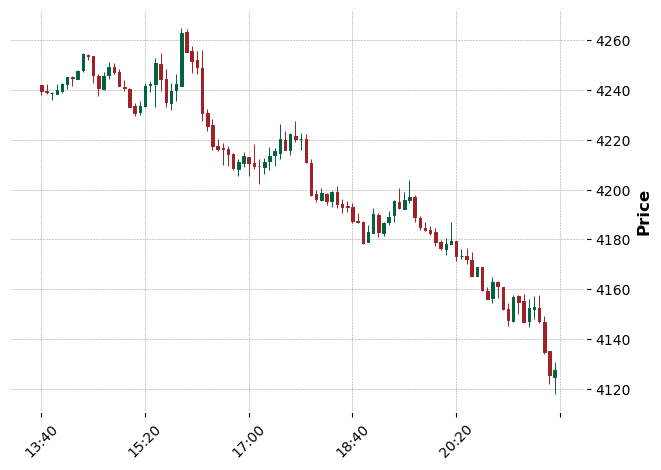

In [14]:
mpl.plot(df, volume=False, type='candle', style='charles')

In [ ]:
client = connections.connect_binance_futures_api()

In [ ]:
d = client.depth(symbol='QNTUSDT', limit=500)

In [ ]:
df_list = []
for side in ["bids", "asks"]:
    df = pd.DataFrame(d[side], columns=["price", "quantity"], dtype=float)
    df["side"] = side
    df_list.append(df)
df = pd.concat(df_list).reset_index(drop=True)

In [91]:
df['usd_depth'] = df.price*df.quantity

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
def get_ymax(df):
    sum_bid = df[df.side == 'bids'].usd_depth.sum()
    sum_ask = df[df.side == 'asks'].usd_depth.sum()
    if sum_ask > sum_bid:
        return int(round(sum_ask))
    else:
        return int(round(sum_bid))

In [111]:
get_ymax(df)

1693680

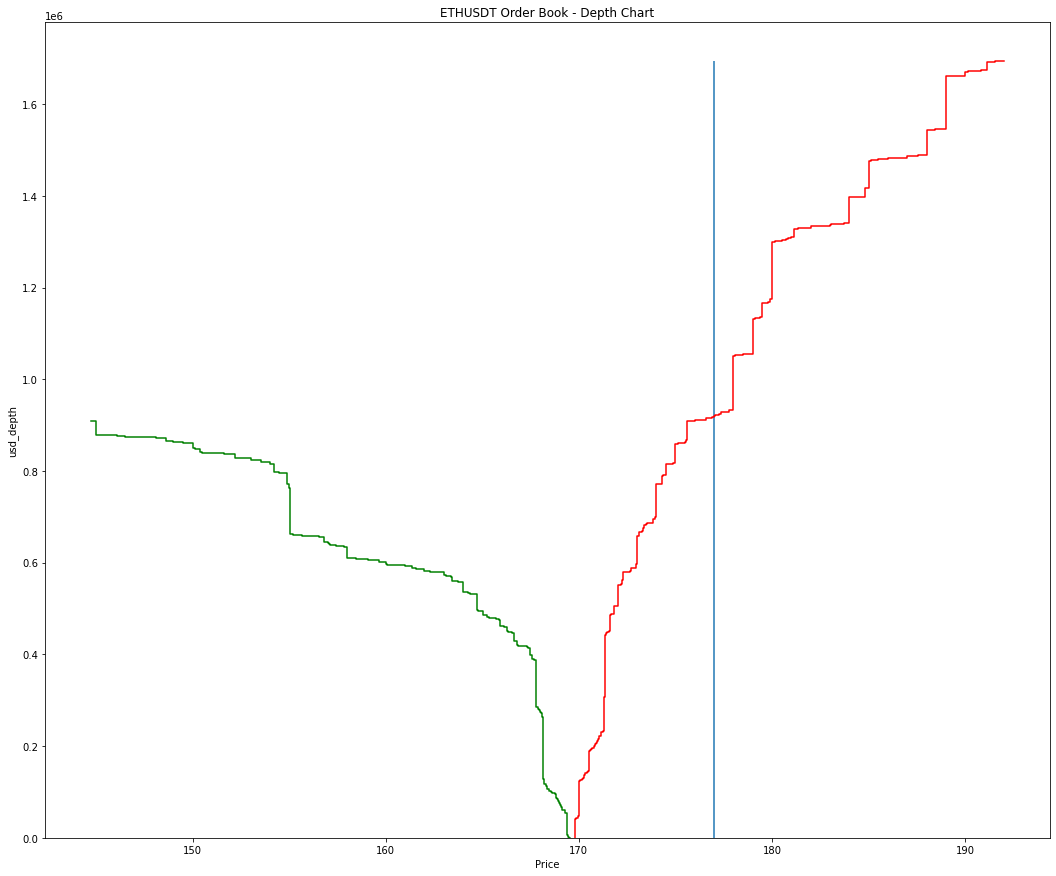

In [113]:
fig, ax = plt.subplots(figsize=[18, 15])
ax.set_title(f"ETHUSDT Order Book - Depth Chart")
sns.ecdfplot(x="price", weights="usd_depth", stat="count", 
             complementary=True, data=df.query("side == 'bids'"), 
             color="green", ax=ax)
sns.ecdfplot(x="price", weights="usd_depth", stat="count", 
             data=df.query("side == 'asks'"), color="red", 
             ax=ax)
ax.set_xlabel("Price")
ax.set_ylabel("usd_depth")
plt.vlines(177, ymin=0, ymax=get_ymax(df))

In [3]:
client = connections.connect_binance_futures_api()

In [5]:
d = client.open_interest_hist('BTCUSDT', '5m')

In [8]:
d[len(d) - 1]

{'symbol': 'BTCUSDT',
 'sumOpenInterest': '99503.97300000',
 'sumOpenInterestValue': '1662567379.59459640',
 'timestamp': 1671266400000}

In [3]:
from tools import enums

In [4]:
for items in enums.get_twitter_accounts_to_check():
    print(f'https://www.twitter.com/{items}')

https://www.twitter.com/ElCryptoDoc
https://www.twitter.com/CryptoKaduna
https://www.twitter.com/layer3xyz
https://www.twitter.com/Derivatives_Ape
https://www.twitter.com/TheDeFISaint
https://www.twitter.com/MariusCrypt0
https://www.twitter.com/Dr_Carborane_
https://www.twitter.com/bloomstarbms
https://www.twitter.com/Abrahamchase09
https://www.twitter.com/0xDegenz
https://www.twitter.com/Cosmos_Airdrops
https://www.twitter.com/its_airdrop
https://www.twitter.com/NDIDI_GRAM
https://www.twitter.com/MingoAirdrop
https://www.twitter.com/cmtopdog
https://www.twitter.com/BitcoinSLO
https://www.twitter.com/thedefiedge
https://www.twitter.com/alpinestar17
https://www.twitter.com/TharsisHQ
https://www.twitter.com/tapioca_dao
https://www.twitter.com/0xAdesola
https://www.twitter.com/milesdeutscher
https://www.twitter.com/LouisCooper_
https://www.twitter.com/BarryFried1
https://www.twitter.com/CrossChainAlex
https://www.twitter.com/cryptocrossOver
https://www.twitter.com/cryptoskullx
https://www

In [3]:
c = connections.connect_binance_futures_api()

In [7]:
import pandas as pd
import numpy as np
from scipy import stats, signal
import plotly.express as px
import plotly.graph_objects as go

In [31]:
candles = dp.get_binance_futures_candlesticks(c, 'BTCUSDT', '30m', 1000)
df = dp.prepare_df_with_binance_futures_candlesticks(candles)
volume = df['volume']
close = df['close']

2023-01-12 17:22:38. BINANCEFUT: BTCUSDT - 30m candle - download finished.


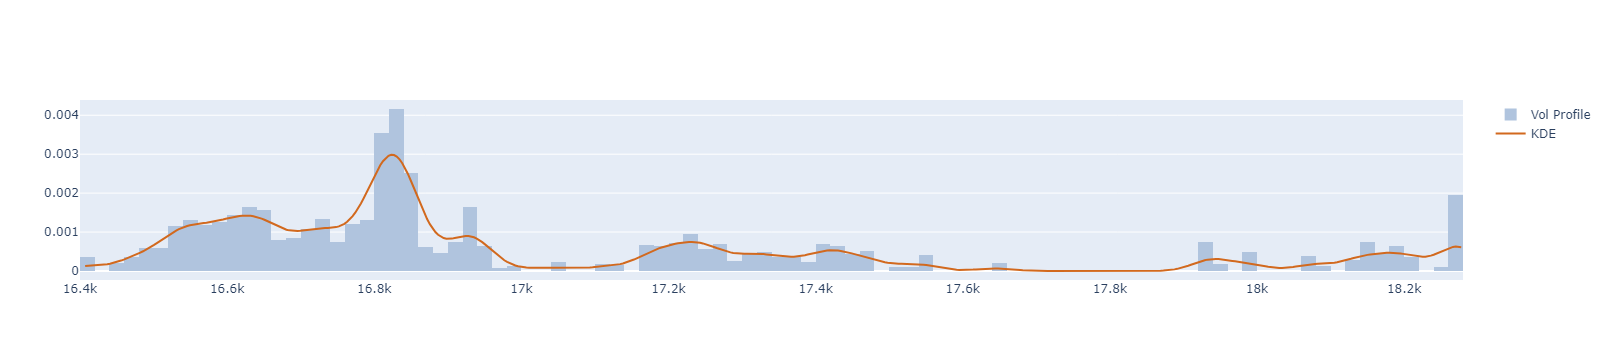

In [32]:
kde_factor = 0.05
num_samples = 500
kde = stats.gaussian_kde(close,weights=volume,bw_method=kde_factor)
xr = np.linspace(close.min(),close.max(),num_samples)
kdy = kde(xr)
ticks_per_sample = (xr.max() - xr.min()) / num_samples

def get_dist_plot(c, v, kx, ky):
    fig = go.Figure()
    fig.add_trace(go.Histogram(name='Vol Profile', x=c, y=v, nbinsx=150, 
                               histfunc='sum', histnorm='probability density',
                               marker_color='#B0C4DE'))
    fig.add_trace(go.Scatter(name='KDE', x=kx, y=ky, mode='lines', marker_color='#D2691E'))
    return fig

get_dist_plot(close, volume, xr, kdy).show()

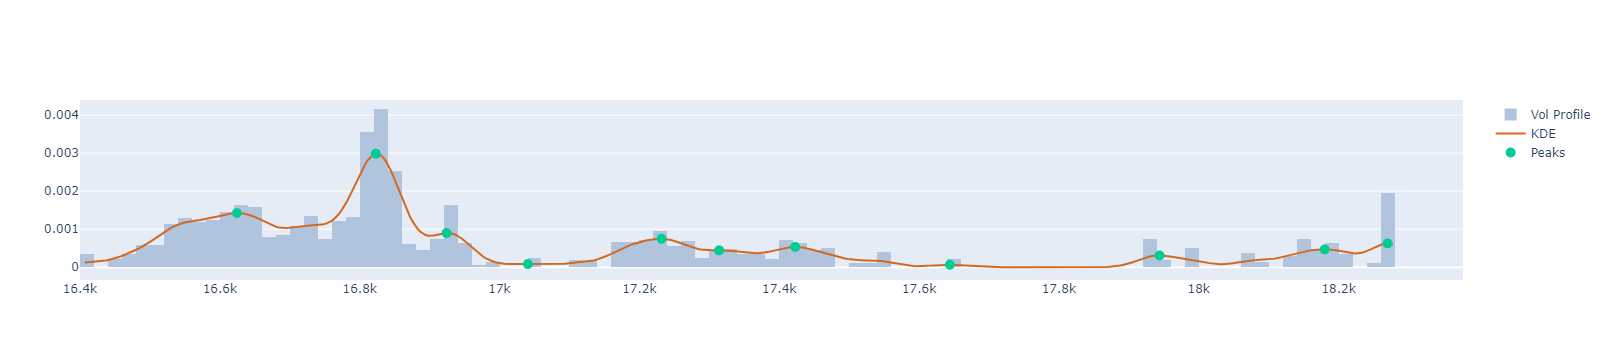

In [33]:
peaks,_ = signal.find_peaks(kdy)
pkx = xr[peaks]
pky = kdy[peaks]

pk_marker_args=dict(size=10)
fig = get_dist_plot(close, volume, xr, kdy)
fig.add_trace(go.Scatter(name="Peaks", x=pkx, y=pky, mode='markers', marker=pk_marker_args))

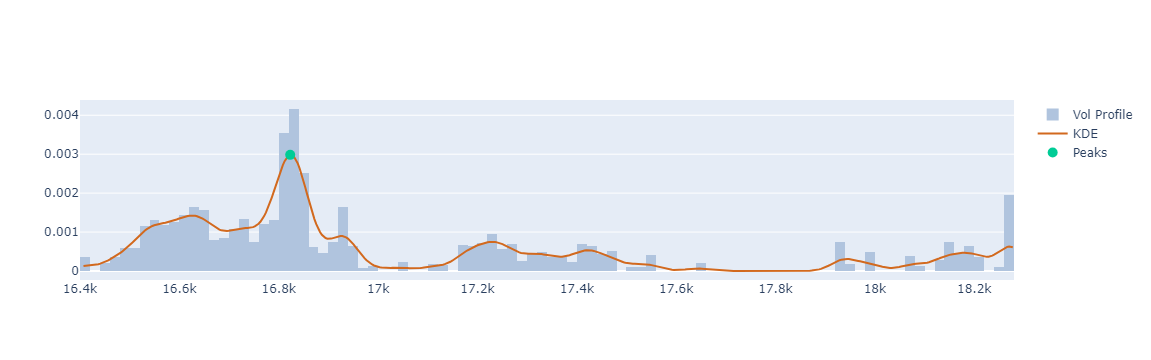

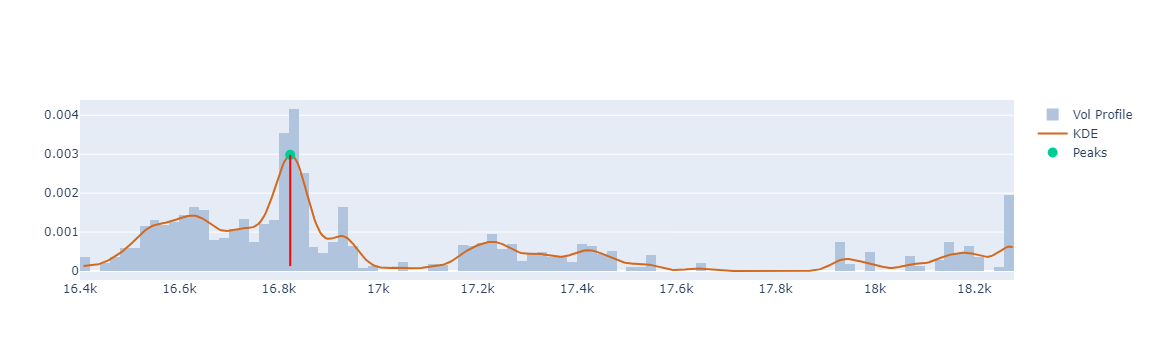

In [36]:
min_prom = kdy.max() * 0.25
peaks, peak_props = signal.find_peaks(kdy, prominence=min_prom)
pkx = xr[peaks]
pky = kdy[peaks]


fig = get_dist_plot(close, volume, xr, kdy)
fig.add_trace(go.Scatter(name='Peaks', x=pkx, y=pky, mode='markers', marker=pk_marker_args))
fig.show()

# Draw prominence lines
#left_base = peak_props['left_bases']
#right_base = peak_props['right_bases']
line_x = pkx
line_y0 = pky
line_y1 = pky - peak_props['prominences']

for x, y0, y1 in zip(line_x, line_y0, line_y1):
    fig.add_shape(type='line',
        xref='x', yref='y',
        x0=x, y0=y0, x1=x, y1=y1,
        line=dict(
            color='red',
            width=2,
        )
    )
fig.show()

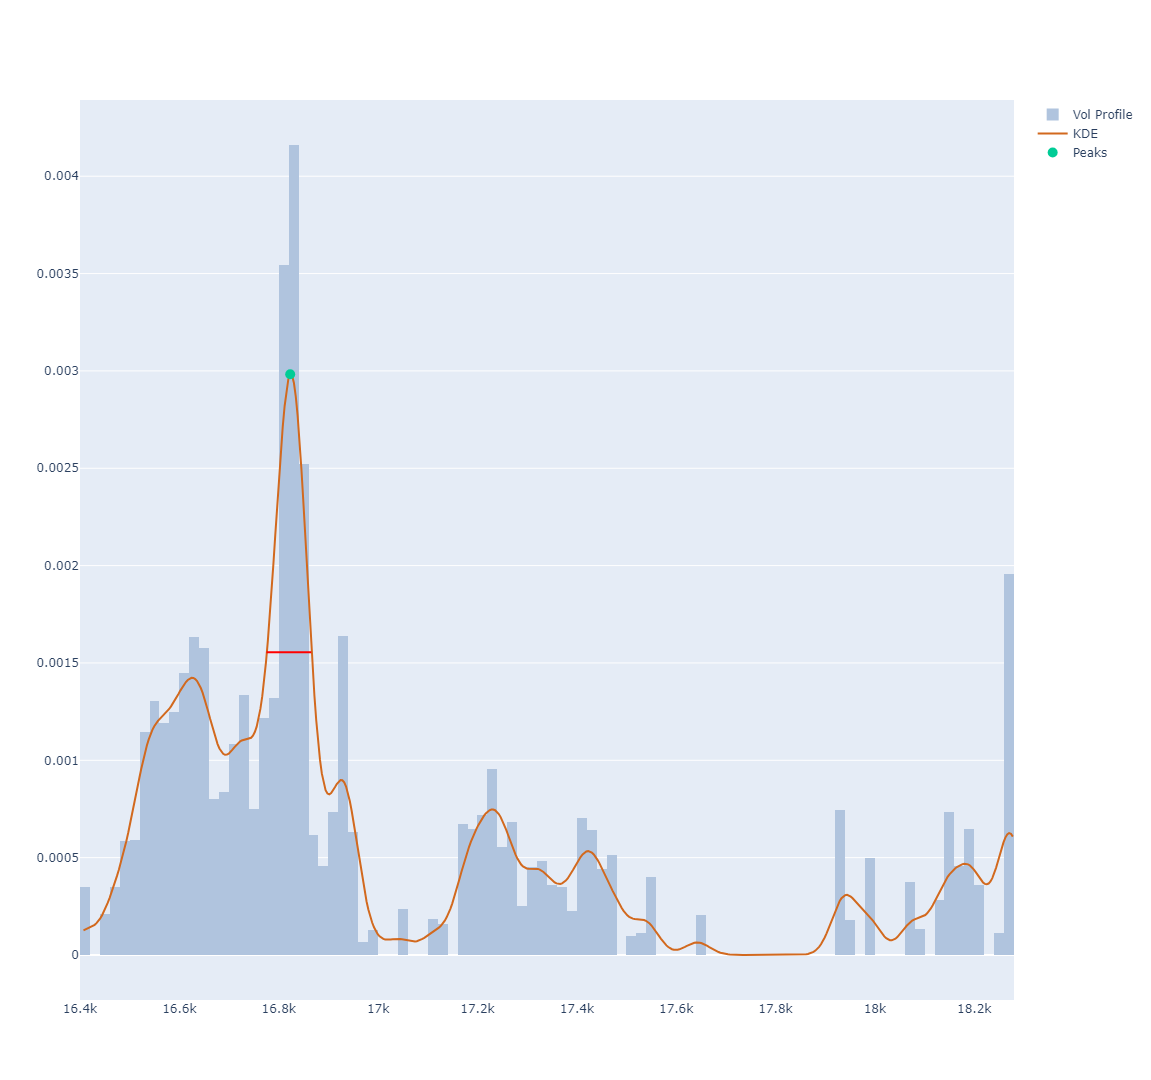

In [35]:
width_range=1
peaks, peak_props = signal.find_peaks(kdy, prominence=min_prom, width=width_range)

left_ips = peak_props['left_ips']
right_ips = peak_props['right_ips']
width_x0 = xr.min() + (left_ips * ticks_per_sample)
width_x1 = xr.min() + (right_ips * ticks_per_sample)
width_y = peak_props['width_heights']

fig = get_dist_plot(close, volume, xr, kdy)
fig.add_trace(go.Scatter(name='Peaks', x=pkx, y=pky, mode='markers', marker=pk_marker_args))

for x0, x1, y in zip(width_x0, width_x1, width_y):
    fig.add_shape(type='line',
        xref='x', yref='y',
        x0=x0, y0=y, x1=x1, y1=y,
        line=dict(
            color='red',
            width=2,
        )
    )
fig.show()

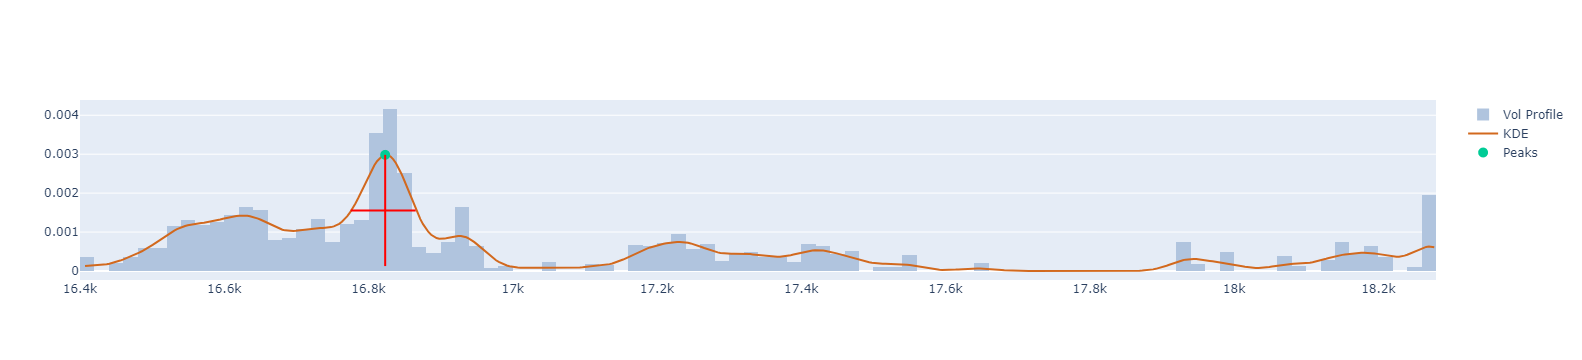

In [37]:
pipsize = 0.0001
max_width_pips = 20
min_prom = kdy.max() * 0.3
width_range=(1, max_width_pips * pipsize / ticks_per_sample)
peaks, peak_props = signal.find_peaks(kdy, width=width_range, prominence=min_prom)
pkx = xr[peaks]
pky = kdy[peaks]

for x0, x1, y in zip(width_x0, width_x1, width_y):
    fig.add_shape(type='line',
        xref='x', yref='y',
        x0=x0, y0=y, x1=x1, y1=y,
        line=dict(
            color='red',
            width=2,
        )
    )
fig.show()

In [4]:
user_id = '0xbdfa4f4492dd7b7cf211209c4791af8d52bf5c50'

In [5]:
link = f'https://pro-openapi.debank.com/v1/user/used_chain_list?id={user_id}'

In [6]:
x = requests.get(link, '98777e2ded1803b2712564ec4c5047e1e4603732')

In [8]:
x.json()

{'message': 'You are not authorized to access the URL, you can get your access key from https://cloud.debank.com.'}

In [10]:
w = requests.get('https://api.etherscan.io/api?module=account&action=balance&address=0xa8470c1a460b92bfad6a0ca0f16a886e94a94c6d&tag=latest&apikey=I2EER5I6DGY2GZ3CSPKF2F3PGUAH54QT1J')

In [11]:
w.json()

{'status': '1', 'message': 'OK', 'result': '3994946289635386'}

In [12]:
w

<Response [200]>

In [2]:
wallets_tracker2.WalletsTracker(save_activities=True, apply_time_threshold=True)

2023-02-11 05:37:27. RektFoodFarmer: 0xa0d031e3106967194be9f2f897407659b423cb7c
2023-02-11 05:37:27. https://debank.com/profile/0xa0d031e3106967194be9f2f897407659b423cb7c





2023-02-11 05:37:32. NEWO whale main wallet: 0x461e76a4fe9f27605d4097a646837c32f1ccc31c
2023-02-11 05:37:32. https://debank.com/profile/0x461e76a4fe9f27605d4097a646837c32f1ccc31c





2023-02-11 05:37:37. NEWO whale acc $100k+ (sold here $40k NEWO): 0xbb030a0408edc41f3c61ba3f132c06e93eda68f4
2023-02-11 05:37:37. https://debank.com/profile/0xbb030a0408edc41f3c61ba3f132c06e93eda68f4





2023-02-11 05:37:41. NEWO whale 1st acc: 0x57efbe536d87b738e42740920b99fd820ac41777
2023-02-11 05:37:41. https://debank.com/profile/0x57efbe536d87b738e42740920b99fd820ac41777





2023-02-11 05:37:46. NEWO whale 2nd acc: 0x5b3ab92e283eadf2cf71a529f2764bba5bff462b
2023-02-11 05:37:46. https://debank.com/profile/0x5b3ab92e283eadf2cf71a529f2764bba5bff462b





2023-02-11 05:37:50. NEWO whale 3th acc: 0x9a7751ed3560d9a0ed0a33d6993a95d8

,action,chain,sends,sends_value,receives,receives_value,counterparty,event_time
0,Swap (check why he uses is),Optimism,6648.080467 OP,"15,981.98500",10.531 WETH,"15,997.95800",no_counterparty,2023-02-11 05:34:23







{'eth_gas_fee': 0.05305051409848286, 'from_addr': '0x53237a2b2203c57dc0e9a3b71190cd1a71a553de', 'name': 'withdrawETH', 'params': [], 'status': 1, 'to_addr': '0x1e4b7a6b903680eab0c5dabcb8fd429cd2a9598c', 'usd_gas_fee': 0.06524152223831423, 'value': 0.0}
2023-02-11 05:38:51. METIS accumulation $250k usd net worth: 0x53237a2b2203c57dc0e9a3b71190cd1a71a553de
2023-02-11 05:38:51. https://debank.com/profile/0x53237a2b2203c57dc0e9a3b71190cd1a71a553de





2023-02-11 05:38:56. $500k wallet: 0x0d66c4eee0c792b9bd38e97676493ed12a55e656
2023-02-11 05:38:56. https://debank.com/profile/0x0d66c4eee0c792b9bd38e97676493ed12a55e656





2023-02-11 05:39:00. GMX Whale $2m - if he sold price dumps: 0x4780e046a55decc374499ba67e679287d9ba0a40
2023-02-11 05:39:00. https://debank.com/profile/0x4780e046a55decc374499ba67e679287d9ba0a40





2023-02-11 05:39:04. GMX Whale $2m second acc  - if he sold price dumps: 0xba154324a2b89d894cde38b492a455fef98c908c
2023-02-11 05:39:04. https://debank.com/profile/0xba